In [5]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

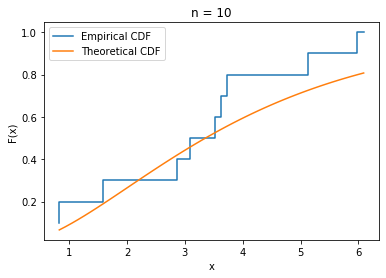

n = 10
Maximum difference = 0.22869115995689915
Empirical 25th percentiles = 0.30000000000000004
Theoretical 25th percentiles = 0.2910049458808668
Empirical 50th percentiles = 0.5
Theoretical 50th percentiles = 0.5159937079407331
Empirical 90th percentiles = 0.9
Theoretical 90th percentiles = 0.7657718942711224



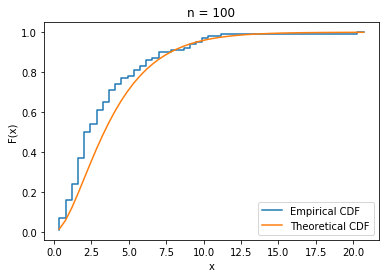

n = 100
Maximum difference = 0.15673874245817637
Empirical 25th percentiles = 0.7875
Theoretical 25th percentiles = 0.7548189578614583
Empirical 50th percentiles = 0.975
Theoretical 50th percentiles = 0.9675105762374454
Empirical 90th percentiles = 0.99
Theoretical 90th percentiles = 0.9990867646814988



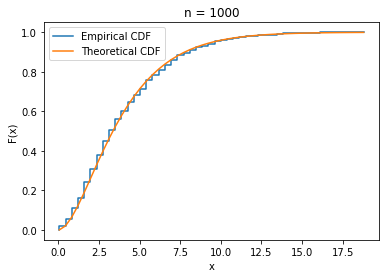

n = 1000
Maximum difference = 0.038361580698897724
Empirical 25th percentiles = 0.654
Theoretical 25th percentiles = 0.6847812888810441
Empirical 50th percentiles = 0.937
Theoretical 50th percentiles = 0.9485503992713049
Empirical 90th percentiles = 0.999
Theoretical 90th percentiles = 0.997993411638683



In [17]:
for samples in [10, 100, 1000]:
    result = []
    for i in range(samples):
        z1 = np.random.standard_normal()
        z2 = np.random.standard_normal()
        z3 = np.random.standard_normal()
        z4 = np.random.standard_normal()
        result.append(z1 ** 2 + z2 ** 2 + z3 ** 2 + z4 ** 2)
    x_cdf = sm.distributions.ECDF(result)
    x = np.linspace(min(result), max(result))
    cdf = stats.chi2.cdf(x, df=4)
    plt.figure()
    plt.title('n = ' + str(samples))
    plt.step(x, x_cdf(x), label='Empirical CDF')
    plt.plot(x, cdf, label='Theoretical CDF')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.show()

    print('n =', samples)
    print('Maximum difference =', max([abs(list(cdf.data)[i]-x_cdf(x)[i]) for i in range(len(x_cdf(x)))]))
    print('Empirical 25th percentiles =', np.percentile(x_cdf(x), 25))
    print('Theoretical 25th percentiles =', np.percentile(list(cdf.data), 25))
    print('Empirical 50th percentiles =', np.percentile(x_cdf(x), 50))
    print('Theoretical 50th percentiles =', np.percentile(list(cdf.data), 50))
    print('Empirical 90th percentiles =', np.percentile(x_cdf(x), 90))
    print('Theoretical 90th percentiles =', np.percentile(list(cdf.data), 90))
    print('')